<a href="https://colab.research.google.com/github/pablex72/vi-phenology-analysis-/blob/main/simple_approach_stages_with_1_2_derivates_inflection_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sowing Points: []
Heading Points: ['2022-01-05 00:00:00']
Maturity Points: ['2022-01-30 00:00:00', '2022-03-31 00:00:00']
Tillering Points: ['2021-12-01 00:00:00', '2022-03-01 00:00:00']
NDVI values for Heading Points: [0.72803151]
NDVI values for Maturity Points: [0.60077173, 0.251657421]
NDVI values for Tillering Points: [0.410792869, 0.382107255]


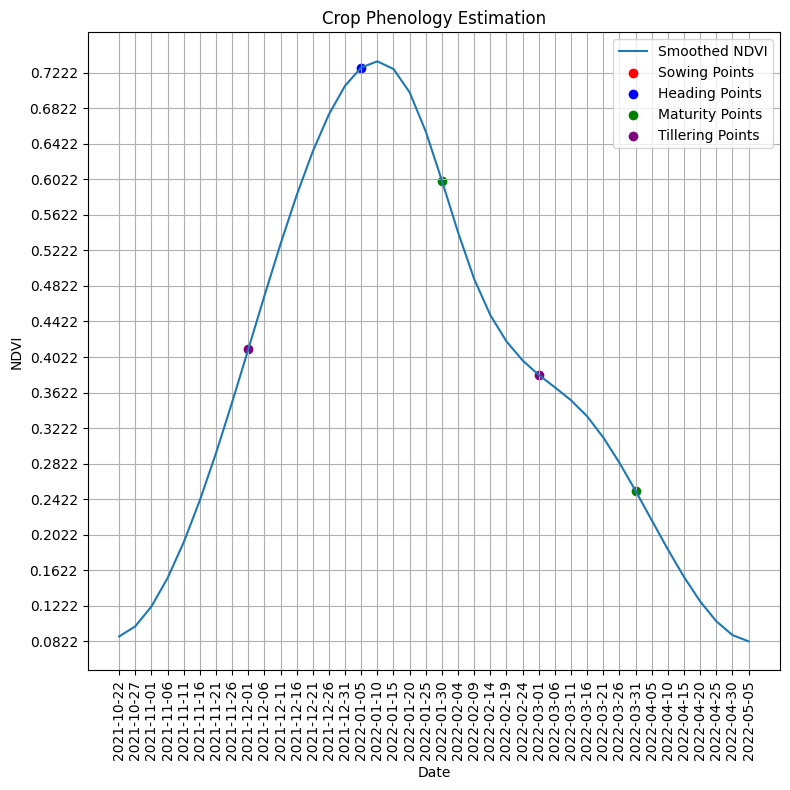

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Read data from CSV file
df = pd.read_csv('/content/one_season_farm3.csv')

# Parse date and NDVI values
dates = pd.to_datetime(df['Date'])
ndvi_values = df['NDVI'].values

smoothed_ndvi = ndvi_values
# Compute first and second order derivatives
first_derivative = np.gradient(smoothed_ndvi)
second_derivative = np.gradient(first_derivative)

# Identify inflection points in derivatives
first_derivative_inflection_points = np.where(np.diff(np.sign(first_derivative)))[0]
second_derivative_inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]

# Initialize lists to store phenology points
sowing_points = []
heading_points = []
maturity_points = []
tillering_points = []

# Identify phenology points based on inflection points
for inflection_point in first_derivative_inflection_points:
    if first_derivative[inflection_point] < 0:
        sowing_points.append(inflection_point)
    else:
        heading_points.append(inflection_point)

for inflection_point in second_derivative_inflection_points:
    if second_derivative[inflection_point] < 0:
        maturity_points.append(inflection_point)
    else:
        tillering_points.append(inflection_point)

# Print dates without "Name: Date, dtype: datetime64[ns]"
print("Sowing Points:", [str(date) for date in dates[sowing_points]])
print("Heading Points:", [str(date) for date in dates[heading_points]])
print("Maturity Points:", [str(date) for date in dates[maturity_points]])
print("Tillering Points:", [str(date) for date in dates[tillering_points]])

# Print corresponding NDVI values for heading, maturity, and tillering points
print("NDVI values for Heading Points:", [smoothed_ndvi[i] for i in heading_points])
print("NDVI values for Maturity Points:", [smoothed_ndvi[i] for i in maturity_points])
print("NDVI values for Tillering Points:", [smoothed_ndvi[i] for i in tillering_points])

plt.figure(figsize=(8, 8))  # Adjust width and height as needed

# Plot the smoothed NDVI and identified phenology points
plt.plot(dates, smoothed_ndvi, label='Smoothed NDVI')
plt.scatter(dates[sowing_points], [smoothed_ndvi[i] for i in sowing_points], color='red', label='Sowing Points')
plt.scatter(dates[heading_points], [smoothed_ndvi[i] for i in heading_points], color='blue', label='Heading Points')
plt.scatter(dates[maturity_points], [smoothed_ndvi[i] for i in maturity_points], color='green', label='Maturity Points')
plt.scatter(dates[tillering_points], [smoothed_ndvi[i] for i in tillering_points], color='purple', label='Tillering Points')

# Set x-axis and y-axis ticks and labels for better granularity
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='5D'), rotation=90)
#plt.yticks(np.arange(min(smoothed_ndvi), max(smoothed_ndvi)+1, step=0.5))
plt.yticks(np.arange(min(smoothed_ndvi), max(smoothed_ndvi), step=0.04))

plt.title('Crop Phenology Estimation')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
